In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [4]:
mnist = keras.datasets.mnist


In [5]:
(train_features, train_labels), (test_features, test_labels)= mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [6]:
train_features.shape

(60000, 28, 28)

In [7]:
test_features.shape

(10000, 28, 28)

5


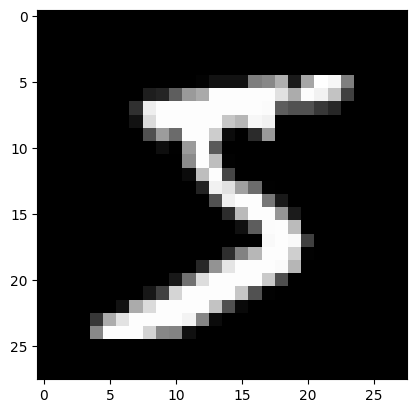

In [8]:
idx=0
img = train_features[idx]

print(train_labels[idx])

plt.gray()
plt.imshow(img)


# Preprocessing


In [9]:
np.min(img), np.max(img)


(0, 255)

In [10]:
train_features= train_features/255.0
test_features = test_features/255.0

# Model definition


In [11]:
model= keras.Sequential()
model.add(keras.layers.Flatten())
model.add (keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [12]:
model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [13]:
model.build(input_shape=(None, 28, 28))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
hist= model.fit(train_features, train_labels, epochs=1000, batch_size=256, validation_data=(test_features, test_labels))

Epoch 1/1000
235/235 [==============================] - 3s 11ms/step - loss: 0.3934 - accuracy: 0.8900 - val_loss: 0.1738 - val_accuracy: 0.9473
Epoch 2/1000
235/235 [==============================] - 2s 6ms/step - loss: 0.1494 - accuracy: 0.9568 - val_loss: 0.1223 - val_accuracy: 0.9635
Epoch 3/1000
235/235 [==============================] - 1s 6ms/step - loss: 0.1072 - accuracy: 0.9681 - val_loss: 0.1015 - val_accuracy: 0.9698
Epoch 4/1000
235/235 [==============================] - 1s 6ms/step - loss: 0.0807 - accuracy: 0.9764 - val_loss: 0.0881 - val_accuracy: 0.9727
Epoch 5/1000
235/235 [==============================] - 1s 6ms/step - loss: 0.0641 - accuracy: 0.9814 - val_loss: 0.0809 - val_accuracy: 0.9750
Epoch 6/1000
235/235 [==============================] - 1s 6ms/step - loss: 0.0520 - accuracy: 0.9846 - val_loss: 0.0718 - val_accuracy: 0.9783
Epoch 7/1000
235/235 [==============================] - 1s 6ms/step - loss: 0.0421 - accuracy: 0.9876 - val_loss: 0.0726 - val_accuracy

In [15]:
model.evaluate(test_features, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3117 - accuracy: 0.9807


[0.31167516112327576, 0.9807000160217285]

In [16]:
idx=100
img= test_features[idx]
print(test_labels[idx])

6


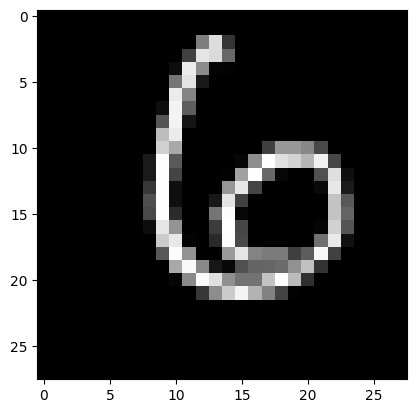

In [17]:
plt.gray()
plt.imshow(img)

In [18]:
model.predict(np.reshape(img,(-1,784)))

1/1 [==============================] - 0s 154ms/step


array([[1.2956449e-26, 4.3583427e-37, 2.9413080e-36, 0.0000000e+00,
        0.0000000e+00, 3.2926295e-34, 1.0000000e+00, 0.0000000e+00,
        2.1269408e-37, 0.0000000e+00]], dtype=float32)

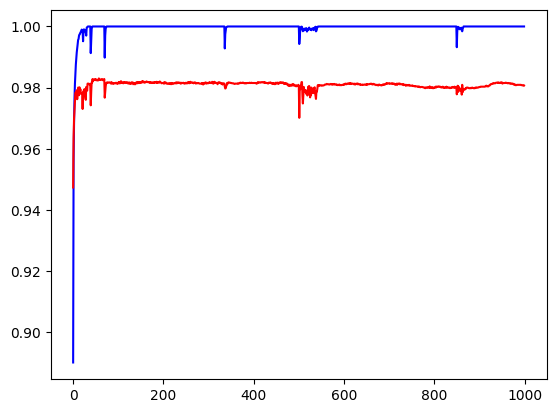

In [19]:
acc= hist.history['accuracy']
val_acc =hist.history['val_accuracy']

plt.plot(acc,color='blue')
plt.plot(val_acc, color='red')